Matrix Algebra
====

Date: October 14, 2014

Copyright (c) 2014 Rafael A. Irizarry MIT License

In [ ]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import scipy
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
from mpl_toolkits.mplot3d import Axes3D #3D plotting
import datetime as dt # module for manipulating dates and times

import requests 
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import binom
from __future__ import division
import re
from zipfile import ZipFile 
from pandas import read_csv
from urllib import urlopen

import sklearn
import sklearn.preprocessing
import sklearn.datasets

#nice defaults for matplotlib
from matplotlib import rcParams

dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

Motivation
====

In [ ]:
url_exprs = "https://raw.githubusercontent.com/cs109/2014_data/master/exprs_GSE5859.csv"
X = pd.read_csv(url_exprs, index_col=0)

url_sampleinfo = "https://raw.githubusercontent.com/cs109/2014_data/master/sampleinfo_GSE5859.csv"
sampleid = pd.read_csv(url_sampleinfo)

a = list(sampleid.filename)
b = list(X.columns)
matchIndex = [b.index(x) for x in a]
X = X[matchIndex]


 Our data is usually saved in matrices. 



In the gene expression example data, $X$, was $8793 \times 208$.


Say you want to compute the average of each column:

In [ ]:
A = np.repeat(1/float(X.shape[0]), X.shape[0]).reshape(1, X.shape[0])
colmeans = np.dot(A, X)
print "Column averages:",np.round(colmeans,2)[0]
pd.DataFrame(np.array([X.columns.values, np.round(colmeans,2)[0]]).transpose(), 
             columns = ["Gene", "Average"]).head(15)

Plot the distribution of the averages: 

In [ ]:
plt.hist(colmeans[0], bins = np.arange(5.60, 5.86, 0.02))
plt.xlim(5.60, 5.84)
plt.xticks(np.arange(5.60, 5.86, 0.04))
plt.xlabel("Average")
plt.ylabel("Frequency")
plt.title("Histogram of colmeans")
plt.show()

Matrix Notation
====

* Let $X$ be a data matrix with $N$ rows and $p$ columns

* The vector of column averages:

$$ \left( \frac{1}{N}\sum_{i=1}^N X_{i,1}, \dots,  \frac{1}{N}\sum_{i=1}^N X_{i,p}\right)$$

can be written like this $AX$ with $A=(\frac{1}{N},\dots,\frac{1}{N})$

Here are the **matrix operations**:
$$AX = \begin{pmatrix}
  \frac{1}{N} & \frac{1}{N} & \dots & \frac{1}{N}
 \end{pmatrix}
\begin{pmatrix}
  X_{1,1}&\dots & X_{1,p} \\
  X_{2,1}&\dots & X_{2,p} \\
   & \vdots & \\
  X_{N,1}&\dots & X_{N,p} \\
  \end{pmatrix}$$
  
$$  =
  \begin{pmatrix}
  \bar{X}_1 & \bar{X}_2 & \dots &\bar{X}_N
  \end{pmatrix}
$$

Here are the ** row averages**:

$$
XB = \begin{pmatrix}
  X_{1,1}&\dots & X_{1,p} \\
  X_{2,1}&\dots & X_{2,p} \\
   & \vdots & \\
  X_{N,1}&\dots & X_{N,p} \\
  \end{pmatrix}
  \begin{pmatrix}
  1/p\\
  1/p\\
  \vdots\\
  1/p\\
   \end{pmatrix}=
  \begin{pmatrix}
  \bar{X}_1 \\
  \bar{X}_2 \\
  \vdots\\
  \bar{X}_q\\
  \end{pmatrix}
$$

Matrix Notation (more general)
====
$$AX = \begin{pmatrix}
  a_1 & a_2 & \dots & a_N
 \end{pmatrix}
\begin{pmatrix}
  X_{1,1}&\dots & X_{1,p} \\
  X_{2,1}&\dots & X_{2,p} \\
   & \vdots & \\
  X_{N,1}&\dots & X_{N,p} \\
  \end{pmatrix}$$
  
$$  =
  \begin{pmatrix}
  \sum_{i=1}^N a_i X_{i,1} & \dots & \sum_{i=1}^N a_i X_{i,p}
  \end{pmatrix}
$$
Convenient and fast for coding

Matrix Notation
====

* Say for each gene you want to compute
  1. the average across all samples
  + the difference between males and females

In [396]:
sex = sampleid['sex']=='M'
A = np.repeat(1/float(X.shape[1]), X.shape[1]).reshape(1, X.shape[1])[0]


In [397]:
A = np.repeat(1/float(X.shape[1]), X.shape[1]).reshape(1, X.shape[1])[0]
B = [1./sum(sex) if x == True else -1./sum(1-sex) for x in sex]
pd.DataFrame([A,B], columns = sampleid.filename.values)

GSM25349.CEL.gz  GSM25350.CEL.gz  GSM25356.CEL.gz  GSM25357.CEL.gz  \
0         0.004808         0.004808         0.004808         0.004808   
1         0.008197         0.008197         0.008197         0.008197   

   GSM25358.CEL.gz  GSM25359.CEL.gz  GSM25360.CEL.gz  GSM25361.CEL.gz  \
0         0.004808         0.004808         0.004808         0.004808   
1         0.008197         0.008197        -0.011628         0.008197   

   GSM25377.CEL.gz  GSM25378.CEL.gz  GSM25385.CEL.gz  GSM25386.CEL.gz  \
0         0.004808         0.004808         0.004808         0.004808   
1         0.008197         0.008197         0.008197         0.008197   

   GSM25399.CEL.gz  GSM25400.CEL.gz  GSM25401.CEL.gz  GSM25402.CEL.gz  \
0         0.004808         0.004808         0.004808         0.004808   
1        -0.011628        -0.011628         0.008197        -0.011628   

   GSM25409.CEL.gz  GSM25410.CEL.gz  GSM25426.CEL.gz  GSM25427.CEL.gz      
0         0.004808         0.004808         0.004808         0.004808 ...  
1         0.008197        -0.011628         0.008197         0.008197 ...  

[2 rows x 208 columns]

Matrix Notation
===
$$\begin{pmatrix}
  X_{1,1}&\dots & X_{1,p} \\
  X_{2,1}&\dots & X_{2,p} \\
   & \vdots & \\
  X_{N,1}&\dots & X_{N,p} \\
  \end{pmatrix}
  \begin{pmatrix}
  1/p&a_1\\
  1/p&a_2\\
  \vdots\\
  1/p&a_p\\
   \end{pmatrix}
$$
with 
$$
\begin{align*}
 a_j &=
  \begin{cases}
   -1/N_F        & \text{if female }  \\
    1/N_M        & \text{if male}
  \end{cases}
\end{align*}
$$

with
$N_F$=number of females and $N_M$=number of males.

Matrix Notation (even more general)
====
$$AX = \begin{pmatrix}
  a_{1,1} & a_{1,2} & \dots & a_{1,N}\\
  a_{2,1} & a_{2,2} & \dots & a_{2,N}\\
  & & \vdots & \\
  a_{M,1} & a_{M,2} & \dots & a_{M,N}\\
   \end{pmatrix}
\begin{pmatrix}
  X_{1,1}&\dots & X_{1,p} \\
  X_{2,1}&\dots & X_{2,p} \\
   & \vdots & \\
  X_{N,1}&\dots & X_{N,p} \\
  \end{pmatrix}=
  \begin{pmatrix}
  \sum_{i=1}^N a_{1,i} X_{i,1} & \dots & \sum_{i=1}^N a_{1,i} X_{i,p}\\
  & \vdots & \\
  \sum_{i=1}^N a_{M,i} X_{i,1} & \dots & \sum_{i=1}^N a_{M,i} X_{i,p}
\end{pmatrix}
$$

Regression Models
====

We used regression with our Baseball data. For example

$$
Y_i= \beta_0 + X_{i}\beta_1 + \varepsilon_i, i=1,\dots,N
$$ 

with $Y_i$ = runs for team $i$ and $X_{i}$ = BB for team $i$.

We need to find the $\beta_0,\beta_1$ pair that minimizes 

$$\sum_{i=1}^N (Y_i- \beta_0 - X_i\beta_1)^2$$

How do we do this?

Linear Algebra Representation
====

We can write it like this:

$$
\begin{pmatrix}
Y_1\\
Y_2\\
\vdots\\
Y_N\\
\end{pmatrix}
=
\begin{pmatrix}
1\\
1\\
\vdots \\
1\\
\end{pmatrix} 
\beta_0 +
\begin{pmatrix}
X_{1}\\
X_{2}\\
\vdots \\
X_{N}\\
\end{pmatrix} \beta_1+ 
\begin{pmatrix}
\varepsilon_1\\
\varepsilon_2\\
\vdots\\
\varepsilon_N\\
\end{pmatrix}\\
$$

The $Y$ column is a point in $\mathbb{R}^N$

The $1$ and $X$ vectors define a subspace, each point defined by the pair $(\beta_0,\beta_1)\in \mathbb{R}^2$.

Projections
====

Recall: The projection of the point $Y$ to the smaller space minimizes the distance.
<center>
<img src="http://upload.wikimedia.org/wikipedia/commons/8/84/Linalg_projection_3.png" height="400">
</center>

Simplest example
====

$\vec{y} \in \mathbb{R}^N$ 
and $L \subset \mathbb{R}^N$ is the space spanned by 

$$\vec{v}=\begin{pmatrix} 1\\ \vdots \\  1\end{pmatrix};
L = \{ c \vec{v}; c \in \mathbb{R}\}$$

What $c$ minimizes distance between $c\vec{v}$ and $\vec{y}$? 

Answer: The projection of $\vec{y}$ onto $L$:
$$
\mbox{Proj}_L(\vec{y}) = \hat{c} \vec{v}
$$

So how do we find $\hat{c}$? 

The projection is orthogonal to the space so:

$$
(\vec{y}-\hat{c}\vec{v}) \cdot \vec{v} = 0
$$

$$
\vec{y}\cdot\vec{v} - \hat{c}\vec{v}\cdot\vec{v} =  0
$$

$$
\hat{c} = \frac{\vec{y}\cdot\vec{v}}
{\vec{v}\cdot\vec{v}}
$$

$$
\hat{c} = \frac{\vec{y}\cdot\vec{v}}
{\vec{v}\cdot\vec{v}}
$$


Going back to our original notation this means $\hat{\beta}_0 = \bar{Y}$

In this case calculus would have been just as easy:

$$\frac{\partial}{\partial\beta_0}\sum_{i=1}^N (Y_i - \beta_0)^2 = 0 \implies 
 - 2 \sum_{i=1}^N (Y_i - \beta_0) = 0 \implies$$

$$ N \beta_0 = \sum_{i=1}^N Y_i \implies \hat{\beta_0}=\bar{Y}$$

Regression Model
===
Make it slightly more complicated.

The space is now

$$ L = \{ \beta_0 \vec{v}_0 + \beta_1 \vec{v}_1 ; \vec{\beta}=(\beta_0,\beta_1) \in \mathbb{R}^2 \}$$

with 

$$
\vec{v}_0=
\begin{pmatrix}
1\\
1\\
\vdots \\
1\\
\end{pmatrix} 
\mbox{ and }
\vec{v}_1=
\begin{pmatrix}
X_{1}\\
X_{2}\\
\vdots \\
X_{N}\\
\end{pmatrix} 
$$

The Transpose
====

The columns become the rows

$$X = \begin{pmatrix}
  X_{1,1}&\dots & X_{1,p} \\
  X_{2,1}&\dots & X_{2,p} \\
   & \vdots & \\
  X_{N,1}&\dots & X_{N,p} \\
  \end{pmatrix} , \,
X^\top = \begin{pmatrix}
  X_{1,1}&\dots & X_{N,1} \\
  X_{1,2}&\dots & X_{N,2} \\
   & \vdots & \\
  X_{1,p}&\dots & X_{N,p} \\
  \end{pmatrix}
  $$

Variance
===
This helps us define projections but also:

If $X$ is $N\times p$ matrix of features for which the columns have average 0, 

$$ S = \frac{1}{N} X^\top X $$

* is called the sample covariance matrix
* $S_{i,i}$ is the variance of column $i$
* $S_{i,j}$ entry is the covariance between columns $i$ and $j$. 
* $$\frac{S_{i,j}}{\sqrt{S_{i,i}S_{j,j}}}$$ is the correlation

Regression Model
====

Let $X = [ \vec{v}_0 \,\, \vec{v}_1]$. It's a $N\times 2$ matrix

Any point $L$ can be writen as $X\beta$. 

The orthogonal projection must have

$X^\top (\vec{y}-X\vec{\beta}) = 0$

$$X^\top X \vec{\beta}=  X^\top y $$

$$\vec{\beta}= (X^\top X)^{-1}X^\top y$$

In general, we can write this

$$
Y_i= \beta_0 + X_{i,1}\beta_1 + \dots X_{i,p} \beta_p + \varepsilon_i, i=1,\dots,N
$$ as

$$
\begin{pmatrix}
Y_1\\
Y_2\\
\vdots\\
Y_N\\
\end{pmatrix}
=
\begin{pmatrix}
1\\
1\\
\vdots \\
1\\
\end{pmatrix} 
\beta_0 +
\begin{pmatrix}
X_{1,1}\\
X_{2,1}\\
\vdots \\
X_{N,1}\\
\end{pmatrix} \beta_1+ 
\dots
+
\begin{pmatrix}
X_{1,p}\\
X_{2,p}\\
 \vdots \\
X_{N,p}\\
\end{pmatrix}\beta_p
+
\begin{pmatrix}
\varepsilon_1\\
\varepsilon_2\\
\vdots\\
\varepsilon_N\\
\end{pmatrix}\\
$$

We can simplify to:

$$Y = X\beta + \varepsilon$$

with
$$
Y = \begin{pmatrix}
Y_1\\
\vdots\\
Y_N\\
\end{pmatrix}, \,
X=\begin{pmatrix}
1&X_{1,1}&\dots&X_{1,p}\\
1&X_{2,1}&\dots&X_{2,p}\\
 & \vdots & \\
1&X_{N,1}&\dots&X_{N,p}
\end{pmatrix}, \,
\beta = \begin{pmatrix}
\beta_1\\
\vdots\\
\beta_p
\end{pmatrix}, \,
\varepsilon = \begin{pmatrix}
\varepsilon_1\\
\vdots\\
\varepsilon_N
\end{pmatrix}
$$

Solution is still 

$$\hat{\beta} = (X^\top X)^{-1} X^\top Y$$

### Application to baseball data:

Read in the data:

In [398]:
zip_folder = requests.get('http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip').content
zip_files = StringIO()
zip_files.write(zip_folder)
csv_files = ZipFile(zip_files)

In [399]:
teams = csv_files.open('Teams.csv')
teams = read_csv(teams)

In [400]:
teams = csv_files.open('Teams.csv')
teams = read_csv(teams)
dat = teams[(teams['G']==162) & (teams['yearID'] < 2002)]
dat['Singles'] = dat['H']-dat['2B']-dat['3B']-dat['HR']
dat = dat[['R','Singles', 'HR', 'BB']]
dat.head(5)

R  Singles   HR   BB
437   505      997   11  344
1366  744      902  189  681
1367  683      989   90  580
1377  817     1041  199  584
1379  718      973  137  602

[5 rows x 4 columns]

Get X and Y:

In [401]:
y = dat.R
X = np.column_stack((np.repeat(1, dat.shape[0]) , dat.BB))
print X

[[  1 344]
 [  1 681]
 [  1 580]
 ..., 
 [  1 519]
 [  1 678]
 [  1 511]]


Solve for $\beta$:

In [402]:
beta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
print beta

[ 326.82416279    0.71264016]


The projection: 

In [403]:
proj = X.dot(beta)
print proj

[ 571.97237855  812.13211317  740.1554568   743.00601745  755.83354037
  768.66106329  684.56952416  694.54648643  723.05209291  658.91447832
  681.71896351  740.86809696  678.1557627   685.99480448  733.74169534
  661.05239881  661.05239881  748.70713875  703.81080854  681.00632335
  653.21335703  641.09847427  614.01814811  664.61559962  639.67319395
  650.36279638  651.7880767   652.50071687  727.32793388  663.1903193
  685.99480448  693.1212061   631.121512    640.38583411  686.70744465
  673.16728157  617.58134892  682.43160367  598.34006455  721.62681259
  706.66136918  703.81080854  721.62681259  687.42008481  675.30520205
  642.5237546   733.02905518  759.39674118  698.10968724  677.44312254
  710.22456999  617.58134892  678.86840286  666.75352011  684.56952416
  692.40856594  719.4888921   647.51223573  700.96024789  713.07513064
  633.25943249  615.44342844  690.27064546  572.68501871  652.50071687
  698.8223274   668.89144059  621.14454973  697.39704708  689.55800529
  591.9

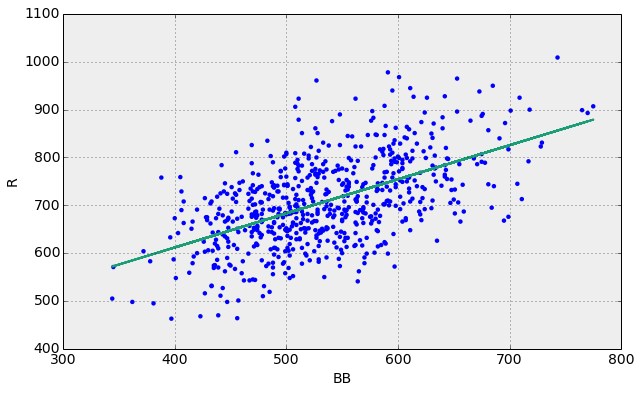

In [404]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1],proj)
plt.xlabel('BB')
plt.ylabel('R')
plt.show()

Now let's add Home Runs:

In [405]:
y = dat.R
X = np.column_stack((np.repeat(1, dat.shape[0]) , dat.BB, dat.HR))
print X

[[  1 344  11]
 [  1 681 189]
 [  1 580  90]
 ..., 
 [  1 519 206]
 [  1 678 161]
 [  1 511 213]]


In [406]:
beta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
print beta
beta.shape

[ 287.72267563    0.38971779    1.52204481]


(3,)

In [407]:
new_prox = X.dot(beta)
len(new_prox)
len(y)

663

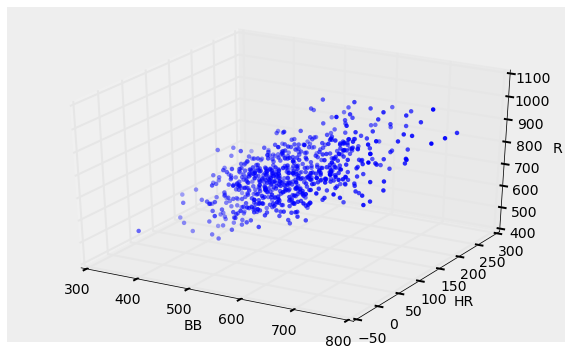

In [408]:
#this requires some 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], y)
ax.set_xlabel('BB')
ax.set_ylabel('HR')
ax.set_zlabel('R')
plt.show()

Singular Value Decomposition (SVD)
===

We have a data matrix with $N$ observations (rows) and $p$ columns. 

We can write our data matrix as

$$X = U D V^\top , \mbox{ with } $$
* $U$ is $N\times p$ with  $U^\top U=I$
* $V$ is $p\times p$ with $V^\top V=I$ and
* $D$ is $p \times p$ diagonal matrix 

We are changing basis: $XV = UD$ 

And can change back $XVV^\top = X$


SVD
====

* Say the columns of $X$ are perfectly correlated

In [409]:
Y1 = np.random.normal(0, size = (100,1))
Y = np.column_stack((Y1,Y1,Y1,Y1,Y1))
Y.shape

(100, 5)

* Then we really have just one column, the SVD catches this:

<code> X =  U[:,0] d[0,0] Vh[0,:] </code>

In [410]:
#Singular Value Decomposition
#U are the left singular vectors
#d are the singular values
#U*d gives PCA scores
#V are the right singular vectors -- PCA loadings
U, d, Vh = scipy.linalg.svd(Y, full_matrices=False)

Print the eigenvalues:

In [411]:
print np.round(d, 6)

[ 22.872792   0.         0.         0.         0.      ]


In [412]:
U1 = U[:,0].reshape(100,1)
dV1 = (d[0] * Vh[0,:].reshape(1,5))
newY = np.dot(U1, dV1)
print dV1

[[-10.22902343 -10.22902343 -10.22902343 -10.22902343 -10.22902343]]


In [413]:
np.round(np.abs(Y-newY).max(),6)

0.0

Motivating SVD
====
Consider this simple linear combination:

$$ \Delta_j = (Y_{1,j}, \dots, Y_{N,j})'(1/N_1,\dots,1/N_1,-1/N_2,\dots,-1/N_2) =$$ 

$$\frac{1}{N_1}\sum_{i=1}^{N_1} Y_{i,j} - \frac{1}{N_2}\sum_{i=N_1+1}^{N} Y_{i,j}, N_2=N-N_1$$

Try to find the $N_1$ that maximizes the variance

$$
\frac{1}{p}\sum_{j=1}^p \Delta_j^2
$$

# Back to gene expression example

In [415]:
url_exprs = "https://raw.githubusercontent.com/cs109/2014_data/master/exprs_GSE5859.csv"
exprs = pd.read_csv(url_exprs, index_col=0)

url_sampleinfo = "https://raw.githubusercontent.com/cs109/2014_data/master/sampleinfo_GSE5859.csv"
sampleinfo = pd.read_csv(url_sampleinfo)
## Re-order the columns in the `exprs` DataFrame to match the order of the file names in the `sampleinfo` DataFrame.
fns = list(sampleinfo.filename)
cns = list(exprs.columns)
matchIndex = [cns.index(x) for x in fns]
exprs = exprs[matchIndex]

##Add a column to the `sampleinfo` DataFrame titled `days` containing the days since October 31, 2002.
sampleinfo["date"] = pd.to_datetime(sampleinfo.date)
oct31 = dt.datetime(2002,10,31,0,0)

sampleinfo["days"] = map(lambda x: (x - oct31).days, sampleinfo.date)

##Subset for CEU only samples only. 
sampleinfoCEU = sampleinfo[sampleinfo.ethnicity == "CEU"]
exprsCEU = exprs[sampleinfoCEU.filename]

###Remove the mean
X = exprsCEU.apply(lambda x: x - exprsCEU.mean(axis=1), \
                              axis = 0)
X=X.T
X.shape

(102, 8793)

** SVD **

In [416]:
#Singular Value Decomposition
#U are the left singular vectors
#d are the singular values
#U*d gives PCA scores
#V are the right singular vectors -- PCA loadings
U, d, Vh = scipy.linalg.svd(X,full_matrices=False)

In [417]:
Vh.shape

(102, 8793)

** First PC correlates with batch **

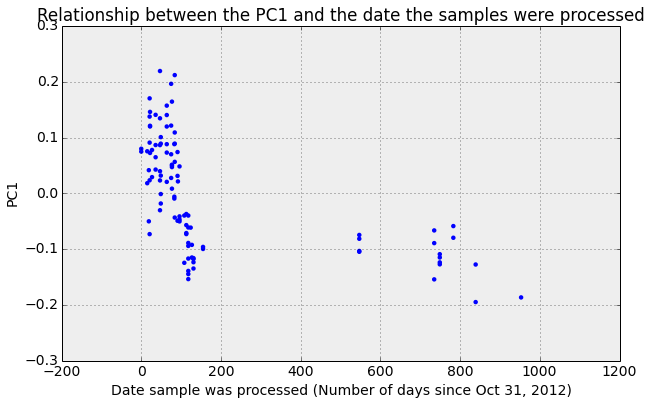

In [418]:
plt.scatter(sampleinfoCEU.days, U.transpose()[0,:])
plt.xlabel('Date sample was processed (Number of days since Oct 31, 2012)')
plt.ylabel('PC1')
plt.title('Relationship between the PC1 and the date the samples were processed')
plt.ylim()
plt.show()

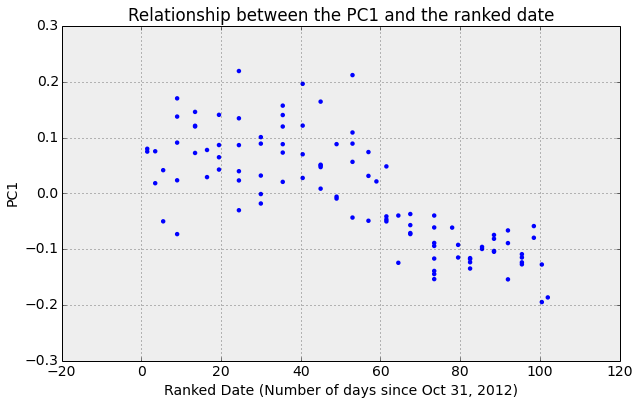

In [419]:
rankDays = scipy.stats.mstats.rankdata(sampleinfoCEU.days)
plt.scatter(rankDays, U.transpose()[0,:])
plt.xlabel('Ranked Date (Number of days since Oct 31, 2012)')
plt.ylabel('PC1')
plt.title('Relationship between the PC1 and the ranked date')
plt.show()

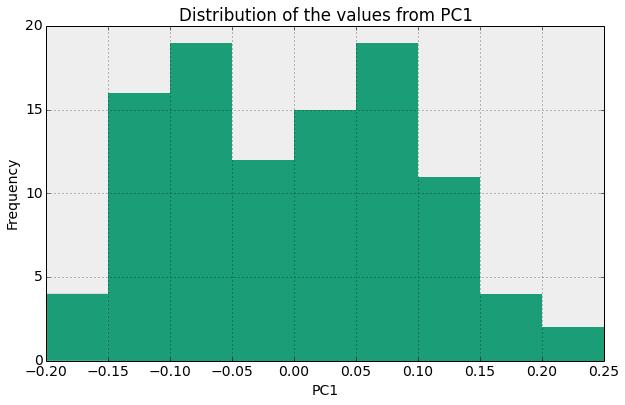

In [420]:
plt.hist(U.transpose()[0,:], bins = np.arange(-0.2,0.3,0.05))
plt.xlabel('PC1')
plt.ylabel('Frequency')
plt.title('Distribution of the values from PC1')
plt.show()

# Applications of SVD: Iris Example

### Load in iris data

In [421]:
#Load the dataset from sklearn's library of example datasets
iris = sklearn.datasets.load_iris()

#data are the features (here, flower measurements)
X = iris.data
#target are the classes we wish to recover (here, flower species)
Y = iris.target

Take only the petal length attributes and scale.

In [422]:
X = X[:,2:4]
X = sklearn.preprocessing.scale(X, axis = 0)

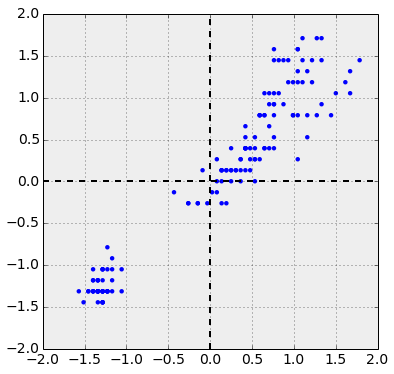

In [424]:
plt.scatter(X[:,0], X[:,1])
plt.axvline(x=0, color = 'black', ls='--')
plt.axhline(y=0, color = 'black', ls='--')
plt.gca().set_aspect('equal')
plt.show()

### What transformation has more varinace?

This is the projection of $(0,1)$ and $(1,0)$

In [425]:
np.apply_along_axis(np.std, 0, X)

array([ 1.,  1.])

### How about this direction?

Line represents the space spaned by 

$$\vec{v}=\begin{pmatrix}1/\sqrt{2}&-1/\sqrt{2}\end{pmatrix}$$

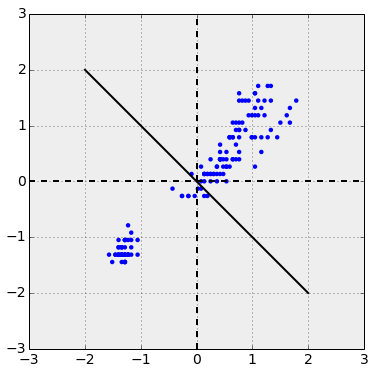

In [426]:
plt.scatter(X[:,0], X[:,1])
plt.axvline(x=0, color = 'black', ls='--')
plt.axhline(y=0, color = 'black', ls='--')
plt.plot([-2,2], [2, -2], c='black')
plt.gca().set_aspect('equal')
plt.show()

### Here is the projection

$$d\vec{u} = X \vec{v}$$

In [427]:
V = (-1,1)/np.sqrt(2)
V = V.reshape(2,1)
dat = np.dot(np.dot(X, V), V.T)

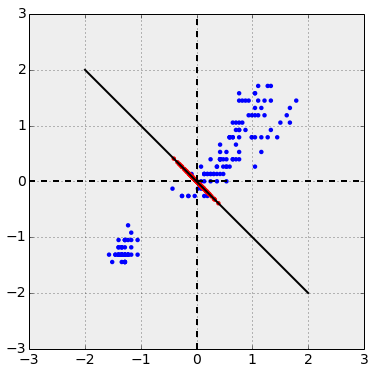

In [428]:
plt.scatter(X[:,0], X[:,1])
plt.axvline(x=0, color = 'black', ls='--')
plt.axhline(y=0, color = 'black', ls='--')
plt.plot([-2,2], [2, -2], c="black")

plt.scatter(dat[:,0], dat[:,1], c='red')
plt.gca().set_aspect('equal')
plt.show()

In [429]:
np.std(np.dot(X, V))

0.19298420388475782

### How about this one?

In [430]:
V = (1,1)/np.sqrt(2)
V = V.reshape(2,1)
dat = np.dot(np.dot(X, V), V.T)

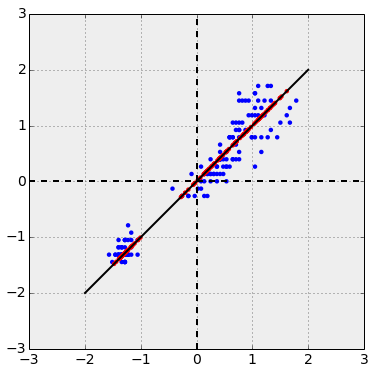

In [431]:
plt.scatter(X[:,0], X[:,1])
plt.axvline(x=0, color = 'black', ls='--')
plt.axhline(y=0, color = 'black', ls='--')
plt.plot([-2,2], [-2, 2], c="black")

plt.scatter(dat[:,0], dat[:,1], c='red')
plt.gca().set_aspect('equal')
plt.show()

In [432]:
np.std(np.dot(X, V))

1.4009843314794663

What is $\vec{v}$ here?

### Transformation

Note these two are orthogonal so let

$$V=\frac{1}{\sqrt{2}}\begin{pmatrix}
1&1\\
1&-1\\
\end{pmatrix}
$$

$XV$ reports something proportional to the average and the difference.

The orthogonality is convenient because we can change back and forth: 

$$XVV^\top = X$$

** SVD gives us that transformation **


#### Projection to first and second PC

In [433]:
#Singular Value Decomposition
#U are the left singular vectors
#d are the singular values
#U*d gives PCA scores
#V are the right singular vectors -- PCA loadings
U, d, V = scipy.linalg.svd(X, full_matrices=False)

In [434]:
print V

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [435]:
np.sqrt((d ** 2) / X.shape[0])

array([ 1.40098433,  0.1929842 ])

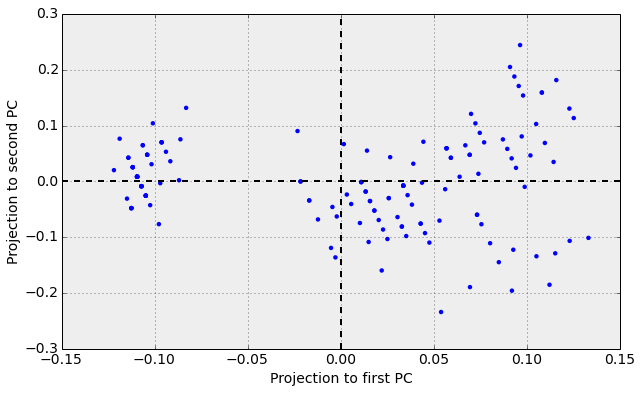

In [436]:
#Plot components of left singular vectors
plt.scatter(U.transpose()[0],U.transpose()[1])
plt.xlabel('Projection to first PC')
plt.ylabel('Projection to second PC')
plt.axvline(x=0, color = 'black', ls='--')
plt.axhline(y=0, color = 'black', ls='--')
plt.show()

### Compression based on SVD 

Get rid of one dimension and recuperate data <code>XV[:,1]V.T </code>

In [437]:
xnew = np.dot(U.transpose()[0][None].T, [d[0]*V[0]])

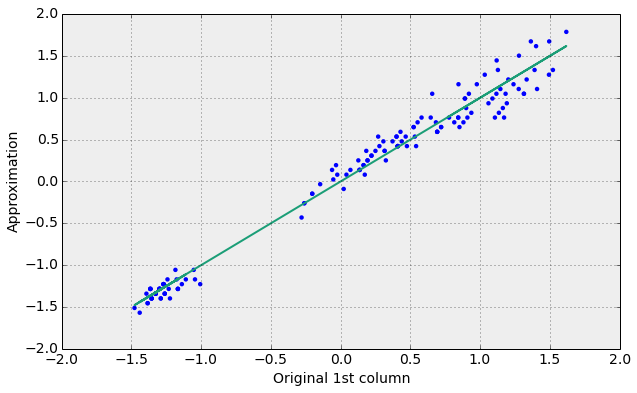

In [438]:
plt.scatter(xnew[:, 0], X[:, 0])
plt.plot(xnew[:, 0],xnew[:, 0])
plt.xlabel("Original 1st column")
plt.ylabel("Approximation")
plt.show()

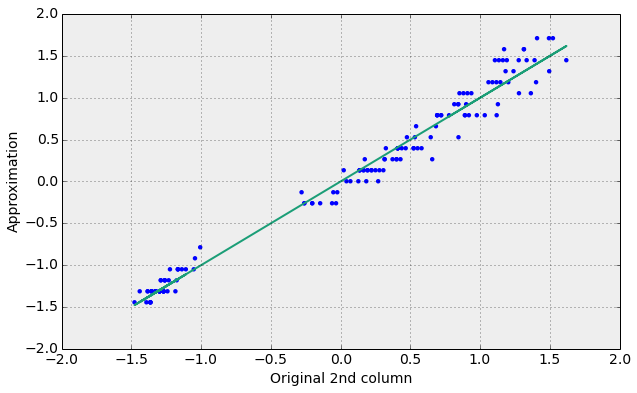

In [439]:
plt.scatter(xnew[:, 1], X[:, 1])
plt.plot(xnew[:, 1],xnew[:, 1])
plt.xlabel("Original 2nd column")
plt.ylabel("Approximation")
plt.show()

#### Proportion of variance

In [440]:
#d^2 is proportional to the variance explained by the dimension
#For variance explained, normalize d^2

var_exp = d**2/sum(d**2)

print "The first component explains %0.2f%% of the variance."%(var_exp[0]*100)

The first component explains 98.14% of the variance.


Iris example
====

We take all four features now and apply SVD:

In [441]:
#Load the dataset from sklearn's library of example datasets
iris = sklearn.datasets.load_iris()

#data are the features (here, flower measurements)
X = iris.data
#target are the classes we wish to recover (here, flower species)
Y = iris.target

In [442]:
train = np.array(range(0,35)+range(50,85)+range(100,135))
X = X[:, 0:4]

In [443]:
colmeans = np.dot(np.matrix([np.zeros(len(train))+1/len(train)]),X[train])
colmeans = np.array(colmeans)[0]
X = np.array([a-colmeans for a in X])

In [444]:
names = {0:'setosa', 1:'versicolor', 2:'virginica'}

In [445]:
cols = np.zeros(len(X))
cols[train] = Y[train]

In [446]:
U, d, V = scipy.linalg.svd(X[train,], full_matrices=False)

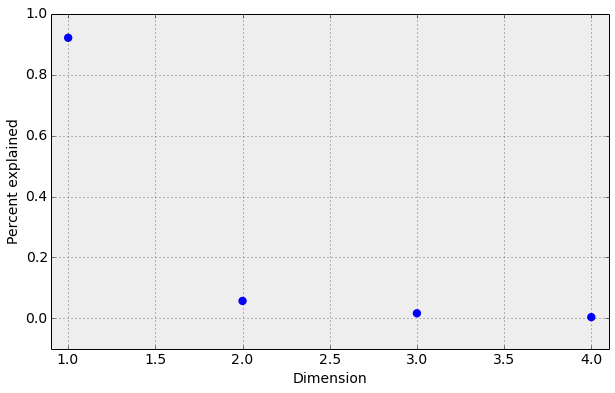

In [447]:
plt.scatter(range(1,5), d**2/np.sum(d**2), s=70)
plt.xlabel("Dimension")
plt.ylabel("Percent explained")
plt.xlim(0.9, 4.1)
plt.ylim(-0.1,1)
plt.show()

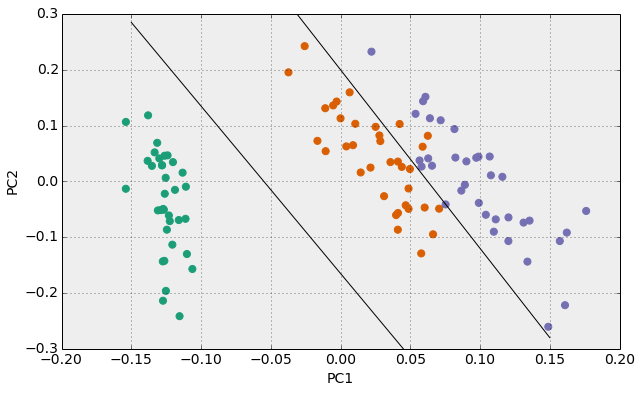

In [448]:
colors = [dark2_colors[i] for i in Y[train]]
plt.scatter(U[:,0], U[:,1], color = colors, s=50)
x = np.array([-0.15, 0.15])
plt.plot(x, -3*x-.165, color='k', linestyle='-', linewidth=1)
plt.plot(x, -3.2*x+0.2, color='k', linestyle='-', linewidth=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.ylim(-0.3,0.3)
plt.show()

In [449]:
newd = np.array(np.matrix([1/d]).T)
newd = np.diag(newd[:,0])
a = list(set(range(0,len(X))) - set(train))
a.sort()
newu = np.dot(X[a, ],V.T).dot(newd)

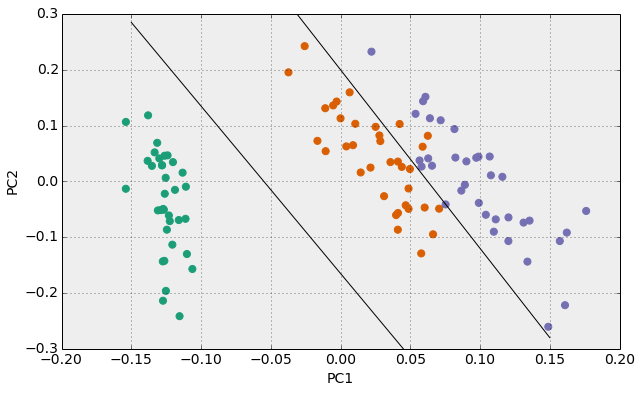

In [450]:
colors = [dark2_colors[i] for i in Y[train]]
plt.scatter(U[:,0], U[:,1], color = colors, s=50)
x = np.array([-0.15, 0.15])
plt.plot(x, -3*x-.165, color='k', linestyle='-', linewidth=1)
plt.plot(x, -3.2*x+0.2, color='k', linestyle='-', linewidth=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.ylim(-0.3,0.3)
plt.show()

Obtain $V$  from $X_{train}=UDV^\top$

Apply to $X_{test} V$

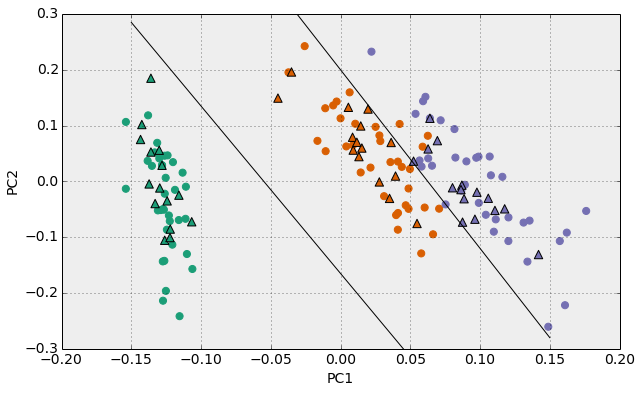

In [451]:
colors = [dark2_colors[i] for i in Y[train]]
plt.scatter(U[:,0], U[:,1], color = colors, s=50)
colors = [dark2_colors[i] for i in Y[a]]
plt.scatter(newu[:,0], newu[:,1], s=70, marker = '^', facecolors=colors, edgecolors='k')
x = np.array([-0.15, 0.15])
plt.plot(x, -3*x-.165, color='k', linestyle='-', linewidth=1)
plt.plot(x, -3.2*x+0.2, color='k', linestyle='-', linewidth=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.ylim(-0.3,0.3)
plt.show()